In [14]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Set up working directory - adjust this to where the repo is stored locally
%cd '/Users/patmccornack/Documents/ucsb_fog_project/_repositories/sci-wrf-analysis'

# About

__Author__: Pat McCornack

__Date__: 12/26/24

__Description__: This notebook assesses how performing quantile mapping on the extracted downscaled WRF data for Santa Cruz Island compares to the raw extracted data. Initially we were also going to assess the impact of interpolating extracted data to the station location using the nearest grid cell centers, but evidence suggests this method doesn't represent station elevation well due to the averaging over 1 sq. km.

The purpose of this is to assess how well the downscaled WRF data represents actual conditions at Santa Cruz Island, in the interest of using it to develop a climatology of fog. While it is effective in correcting the systematic bias, it doesn't imporve the error much. Evidence suggests that WRF tends to underpredict stratocumulus clouds. 

# Functions

In [2]:
def plot_stats(df, metric):
    """
    Create bar chart comparing different methods of extracting/preprocessing WRF data. 
    
    Parameters:
    -----------
        df : pd.DataFrame 
            A dataframe containing statistics for each site/variable.
        metric : str
            Which statistic to plot.
    
    Returns: 
    --------
        None
    """
    
    g = sns.catplot(
        data=df, kind="bar",
        x="variable", y=metric, hue="type",  # Group by 'type' on the x-axis
        palette="tab10", alpha=.6, height=8,
        ci=None
    )
    g.set_axis_labels("Type", metric)  # Label the x-axis
    g.legend.set_title("")  # Remove the title of the legend
    g.set(title=metric)  # Set the plot title

    # Add value labels
    ax = g.ax  # Get the matplotlib axis
    for bar in ax.patches:  # Iterate through the bars
        bar_height = bar.get_height()  # Get bar height
        bar_x = bar.get_x() + bar.get_width() / 2.0  # Get bar x position
        ax.text(bar_x, bar_height, f'{bar_height:.2f}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.show()

# Read in Data

In [20]:
data_dir = './data/outputs/comparison-stats'
wraw_fname = 'wrf-raw-stats.csv'
wint_fname = 'wrf-interpolated-stats.csv'
wqm_fname = 'wrf-qm-stats.csv'

wraw_df = pd.read_csv(os.path.join(data_dir, wraw_fname), index_col=0)
wint_df = pd.read_csv(os.path.join(data_dir, wint_fname), index_col=0)
wqm_df = pd.read_csv(os.path.join(data_dir, wqm_fname), index_col=0)

In [9]:
df = pd.concat([wraw_df, wint_df, wqm_df], axis=0) # Join all sites
df.head()

,site,variable,correlation,bias,rmse,mae,type
0,Sauces Canyon,air temperature (C),0.87,1.20,2.76,2.02,raw
0,Sauces Canyon,relative humidity (%),0.82,-8.21,17.54,12.76,raw
0,Sauces Canyon,wind speed (m/s),0.58,2.96,3.68,3.06,raw
0,Sauces Canyon,wind direction (deg),0.54,-8.39,93.55,55.16,raw
0,Upper Embudo Canyon,air temperature (C),0.89,1.61,3.10,2.28,raw


# Plot Stats

In [10]:
# define parameters
var_list = ['air temperature (C)', 'relative humidity (%)', 'wind speed (m/s)']
stats = ['correlation', 'bias', 'rmse', 'mae']
site = ['Sauces Canyon', 'Upper Embudo Canyon', 'NRS SCI']

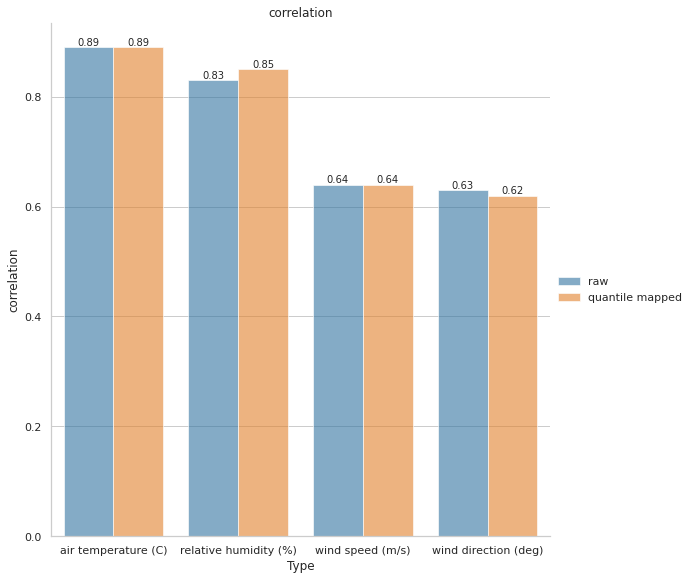

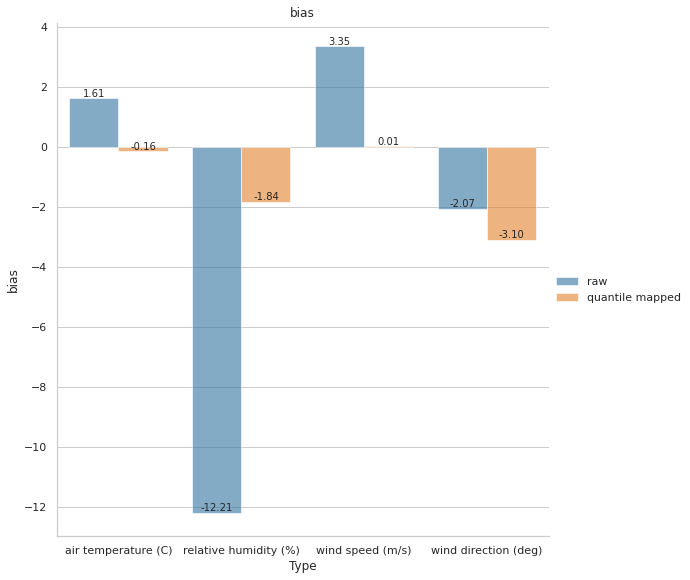

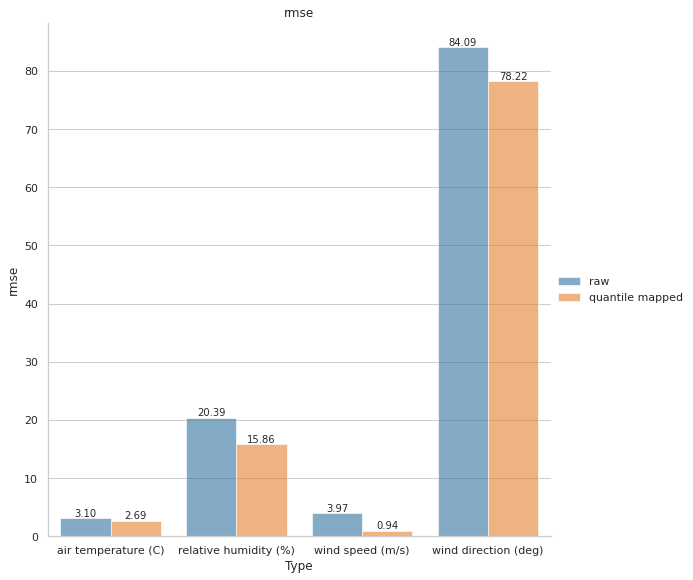

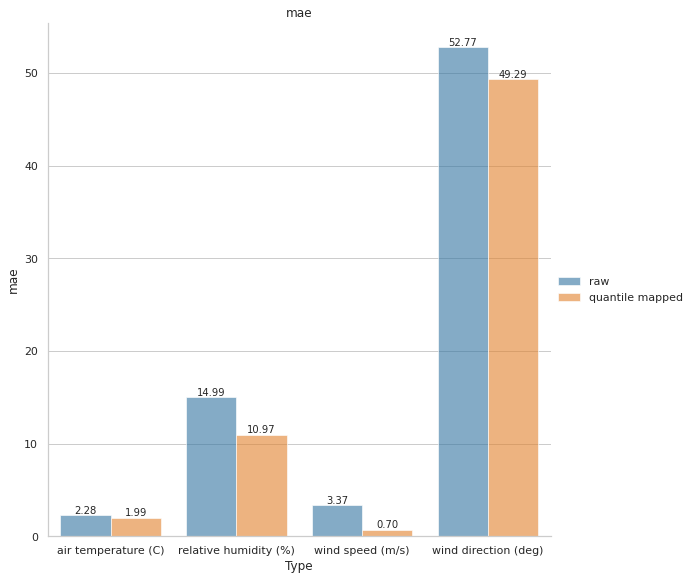

In [22]:
# make plots
tmp = df.loc[df['type'] != 'interpolated']
tmp = tmp.loc[tmp['site'] == 'Upper Embudo Canyon']
for metric in ['correlation', 'bias', 'rmse', 'mae']:
    plot_stats(tmp, metric)